# 02 - Calculating Human-Human Correlations

I know that the EMD scores have an r=-0.87 correlation with the human similarity scores, which is quite high. To further contextualize just how high, I'm curious to look at the distribution of correlations between the different human raters in the dataset to see if EMD falls within the range of human raters consistency with eachother. To do this, I'm going to go through each rater and calculate the correlation between their score and the mean of the rest of the scores. 

## Imports

In [1]:
import numpy as np
import os
import matplotlib.patches as patches
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

## Load SAP Scores

In [2]:
raw_scores = pd.read_csv('full_scoring_with_legend.csv')

In [3]:
raw_scores.Comparison_type.unique()

array(['tut_post_FoxP1_v_tut', 'tut_pre_FoxP1_v_tut',
       'tut_post_GFP_v_tut', 'tut_v_itself', 'duplicate'], dtype=object)

In [4]:
raw_scores.Bird_1.unique()

array(['B308', 'G311', 'B416', 'O314', 'R311', 'O210', 'B103', 'B181',
       'S409'], dtype=object)

In [5]:
raw_scores.Bird_2.unique()

array(['S389', 'Y389', 'G397', 'Y397', 'B402', 'G413', 'O421', 'S421',
       'G402', 'R402', 'Y425', 'R425', 'G437', 'G439', 'O440', 'Y440',
       'B447', 'O434', 'Y433', 'R469', 'B507', 'O512', 'B524', 'G524',
       'B308', 'B103', 'G311', 'O314', 'S525', 'G528', 'S528'],
      dtype=object)

Bird 1 was always the tutor, Bird 2 was the pupil. So we need to group by Bird 2

In [6]:
mean_scores_per_pair = raw_scores.groupby('Bird_2').mean(numeric_only=True).reset_index()

In [7]:
mean_scores_per_pair.head(3)

,Bird_2,Question_number,Duplicate_pair,Thereses-w/outLast3GFPfulltestTEST,Maaya Ikeda,Francisco,Massimo,Todd,Mgaldamez,Andrea Guerrero,Harshida,Jen,Devin Merullo,Dan,Lei Xiao
0,B103,103.5,0.0,9.50,8.0,9.5,9.5,9.5,8.0,8.0,8.0,9.5,5.5,9.0,8.5
1,B308,101.5,0.0,10.00,9.5,10.0,9.0,10.0,8.0,9.0,9.0,9.5,9.0,9.5,8.0
2,B402,39.2,0.8,1.75,3.0,7.4,3.2,2.8,2.4,1.8,2.0,1.4,3.8,0.6,3.6


Not all the birds have EMD scores (because their tutors didn't have enough songs recorded), so we will keep only those birds that made it into the final comparison

In [8]:
dir_path = 'C:\\Grad_School\\Code_and_software\\Py_code\\similarity_scoring\\syllable_triplet_network\\syllable_triplet_network\\WhisperSeg_validation\\'
sap_scores = pd.read_csv("C:/Grad_School/Code_and_software/Py_code/similarity_scoring/tutor_pupil_dataset/Similarity_Scores.csv")
EMD_scores = pd.read_csv(dir_path + "54_emd_Dec_4_01_emds_wseg.csv")
human_scores = pd.read_csv("C:/Grad_School/Code_and_software/R_code/FoxP1_Human_Scoring_analysis/Human scoring averaged by tuttee.csv")
EMD_scores = EMD_scores[EMD_scores['Tutor-pupil'] == True]
mean_sap_scores = sap_scores.groupby("Bird ID")["%Similarity"].mean()
merged_sap_scores = pd.merge(left = EMD_scores, right = mean_sap_scores, left_on = "Bird_ID", right_on = "Bird ID")
all_merged = pd.merge(left = merged_sap_scores[["Bird_ID", "Tutor_ID", "EMD", "%Similarity",]], right = human_scores[["Bird_2", "mean_score", "Comparison_type"]], 
                     left_on = "Bird_ID", right_on = "Bird_2")
all_merged

,Bird_ID,Tutor_ID,EMD,%Similarity,Bird_2,mean_score,Comparison_type
0,G402,O314,0.581091,87.325000,G402,5.159091,tut_pre_FoxP1_v_tut
1,R402,O314,0.652488,73.914894,R402,4.982323,tut_pre_FoxP1_v_tut
2,B447,B181,0.506988,59.100000,B447,7.232323,tut_pre_FoxP1_v_tut
3,S389,B308,0.521639,72.023810,S389,4.765152,tut_post_FoxP1_v_tut
4,Y389,B308,0.963579,67.457627,Y389,1.242424,tut_post_FoxP1_v_tut
5,O421,B308,0.960880,43.700000,O421,1.234848,tut_post_FoxP1_v_tut
6,S421,B308,1.102812,52.375000,S421,0.876263,tut_post_FoxP1_v_tut
7,B402,B308,0.833040,51.393443,B402,2.782828,tut_post_FoxP1_v_tut
8,Y433,B308,0.601753,64.977778,Y433,5.371212,tut_post_GFP_v_tut
9,O434,B308,0.639380,84.317073,O434,5.861111,tut_post_GFP_v_tut


In [9]:
mean_scores_per_pair = mean_scores_per_pair[mean_scores_per_pair.Bird_2.isin(all_merged.Bird_ID)]

In [10]:
mean_scores_per_pair.shape

(15, 15)

In [11]:
raters_to_compare = mean_scores_per_pair.columns[4:]
raters_to_compare

Index(['Maaya Ikeda', 'Francisco', 'Massimo', 'Todd', 'Mgaldamez',
       'Andrea Guerrero', 'Harshida', 'Jen', 'Devin Merullo', 'Dan',
       'Lei Xiao'],
      dtype='object')

In [12]:
from scipy.stats import pearsonr

In [13]:
rs = []
for rater in raters_to_compare:

    curr_rater_scores = mean_scores_per_pair[rater]

    all_other_raters = raters_to_compare[raters_to_compare != rater]
    all_other_mean_scores = mean_scores_per_pair[all_other_raters].mean(axis = 1)

    r, p = pearsonr(curr_rater_scores, all_other_mean_scores)
    rs.append(r)


In [19]:
plt.rcParams.update({'font.size' : 8})

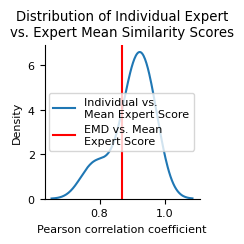

In [20]:
plt.figure(figsize = (2, 2))
sns.kdeplot(rs, label = 'Individual vs.\nMean Expert Score')
plt.axvline(x = 0.87, label = 'EMD vs. Mean \nExpert Score', c = 'red')
plt.legend()
plt.xlabel('Pearson correlation coefficient')
plt.title('Distribution of Individual Expert\nvs. Expert Mean Similarity Scores')
sns.despine()
plt.savefig('emd_vs_human_human_correlations.svg', transparent = True)


In [57]:
from scipy.stats import percentileofscore

percentileofscore(rs, 0.8724)

18.181818181818183